### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
 > Which variables are significant in predicting the price of a car? <br>
 > How well those variables describe the price of a car?


In [2]:
#Read the data
import numpy as np
import pandas as pd

df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Let's look at the structure and type of data 
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# summing up the missing values (column-wise)
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

The data frame consists of 205 entries and 26 columns. There are 10 object variables (categorical) and 
rest are float64(8) and int64(8). We summed up the missing values in each column to find out that there are none. 
No requirement for treating missing values. Now let's check for outliers.

In [7]:
# Let's visualise our data using matplotlib and seaborn.
import matplotlib.pyplot as plt
import seaborn as sns

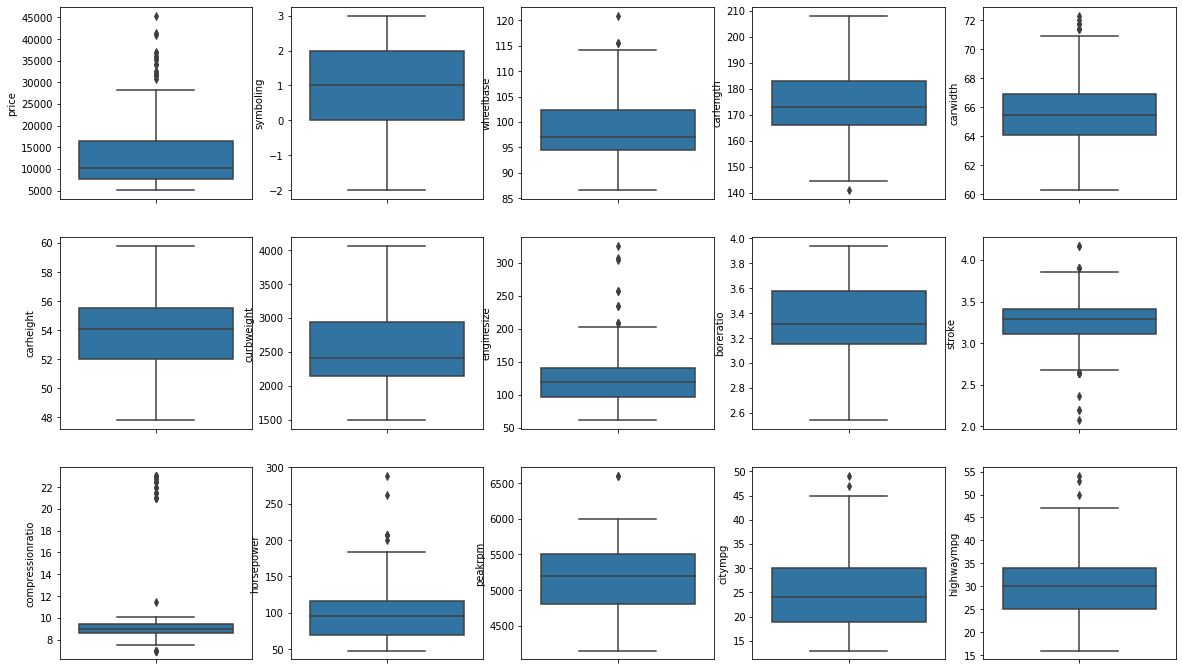

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(3,5,1)
sns.boxplot(y = 'price', data = df)
plt.subplot(3,5,2)
sns.boxplot(y='symboling',data = df)
plt.subplot(3,5,3)
sns.boxplot(y='wheelbase',data = df)
plt.subplot(3,5,4)
sns.boxplot(y='carlength',data = df)
plt.subplot(3,5,5)
sns.boxplot(y='carwidth',data = df)
plt.subplot(3,5,6)
sns.boxplot(y='carheight',data = df)
plt.subplot(3,5,7)
sns.boxplot(y='curbweight',data = df)
plt.subplot(3,5,8)
sns.boxplot(y='enginesize',data = df)
plt.subplot(3,5,9)
sns.boxplot(y='boreratio',data = df)
plt.subplot(3,5,10)
sns.boxplot(y='stroke',data = df)
plt.subplot(3,5,11)
sns.boxplot(y='compressionratio',data = df)
plt.subplot(3,5,12)
sns.boxplot(y='horsepower',data = df)
plt.subplot(3,5,13)
sns.boxplot(y='peakrpm',data = df)
plt.subplot(3,5,14)
sns.boxplot(y='citympg',data = df)
plt.subplot(3,5,15)
sns.boxplot(y='highwaympg',data = df)
plt.show()

>> As we can see there are few variable like compression ratio and stroke which has outliers on both sides.
>> Price has most number of outliers and peakrpm has the least number of outlier in the set.

Let's make a pairplot of all the variables present to visualise which variables are most correlated to Price.
Here, we are considering 'Price' as the dependent variable and trying to find the set of independent variables
which has a linear relationship with it.

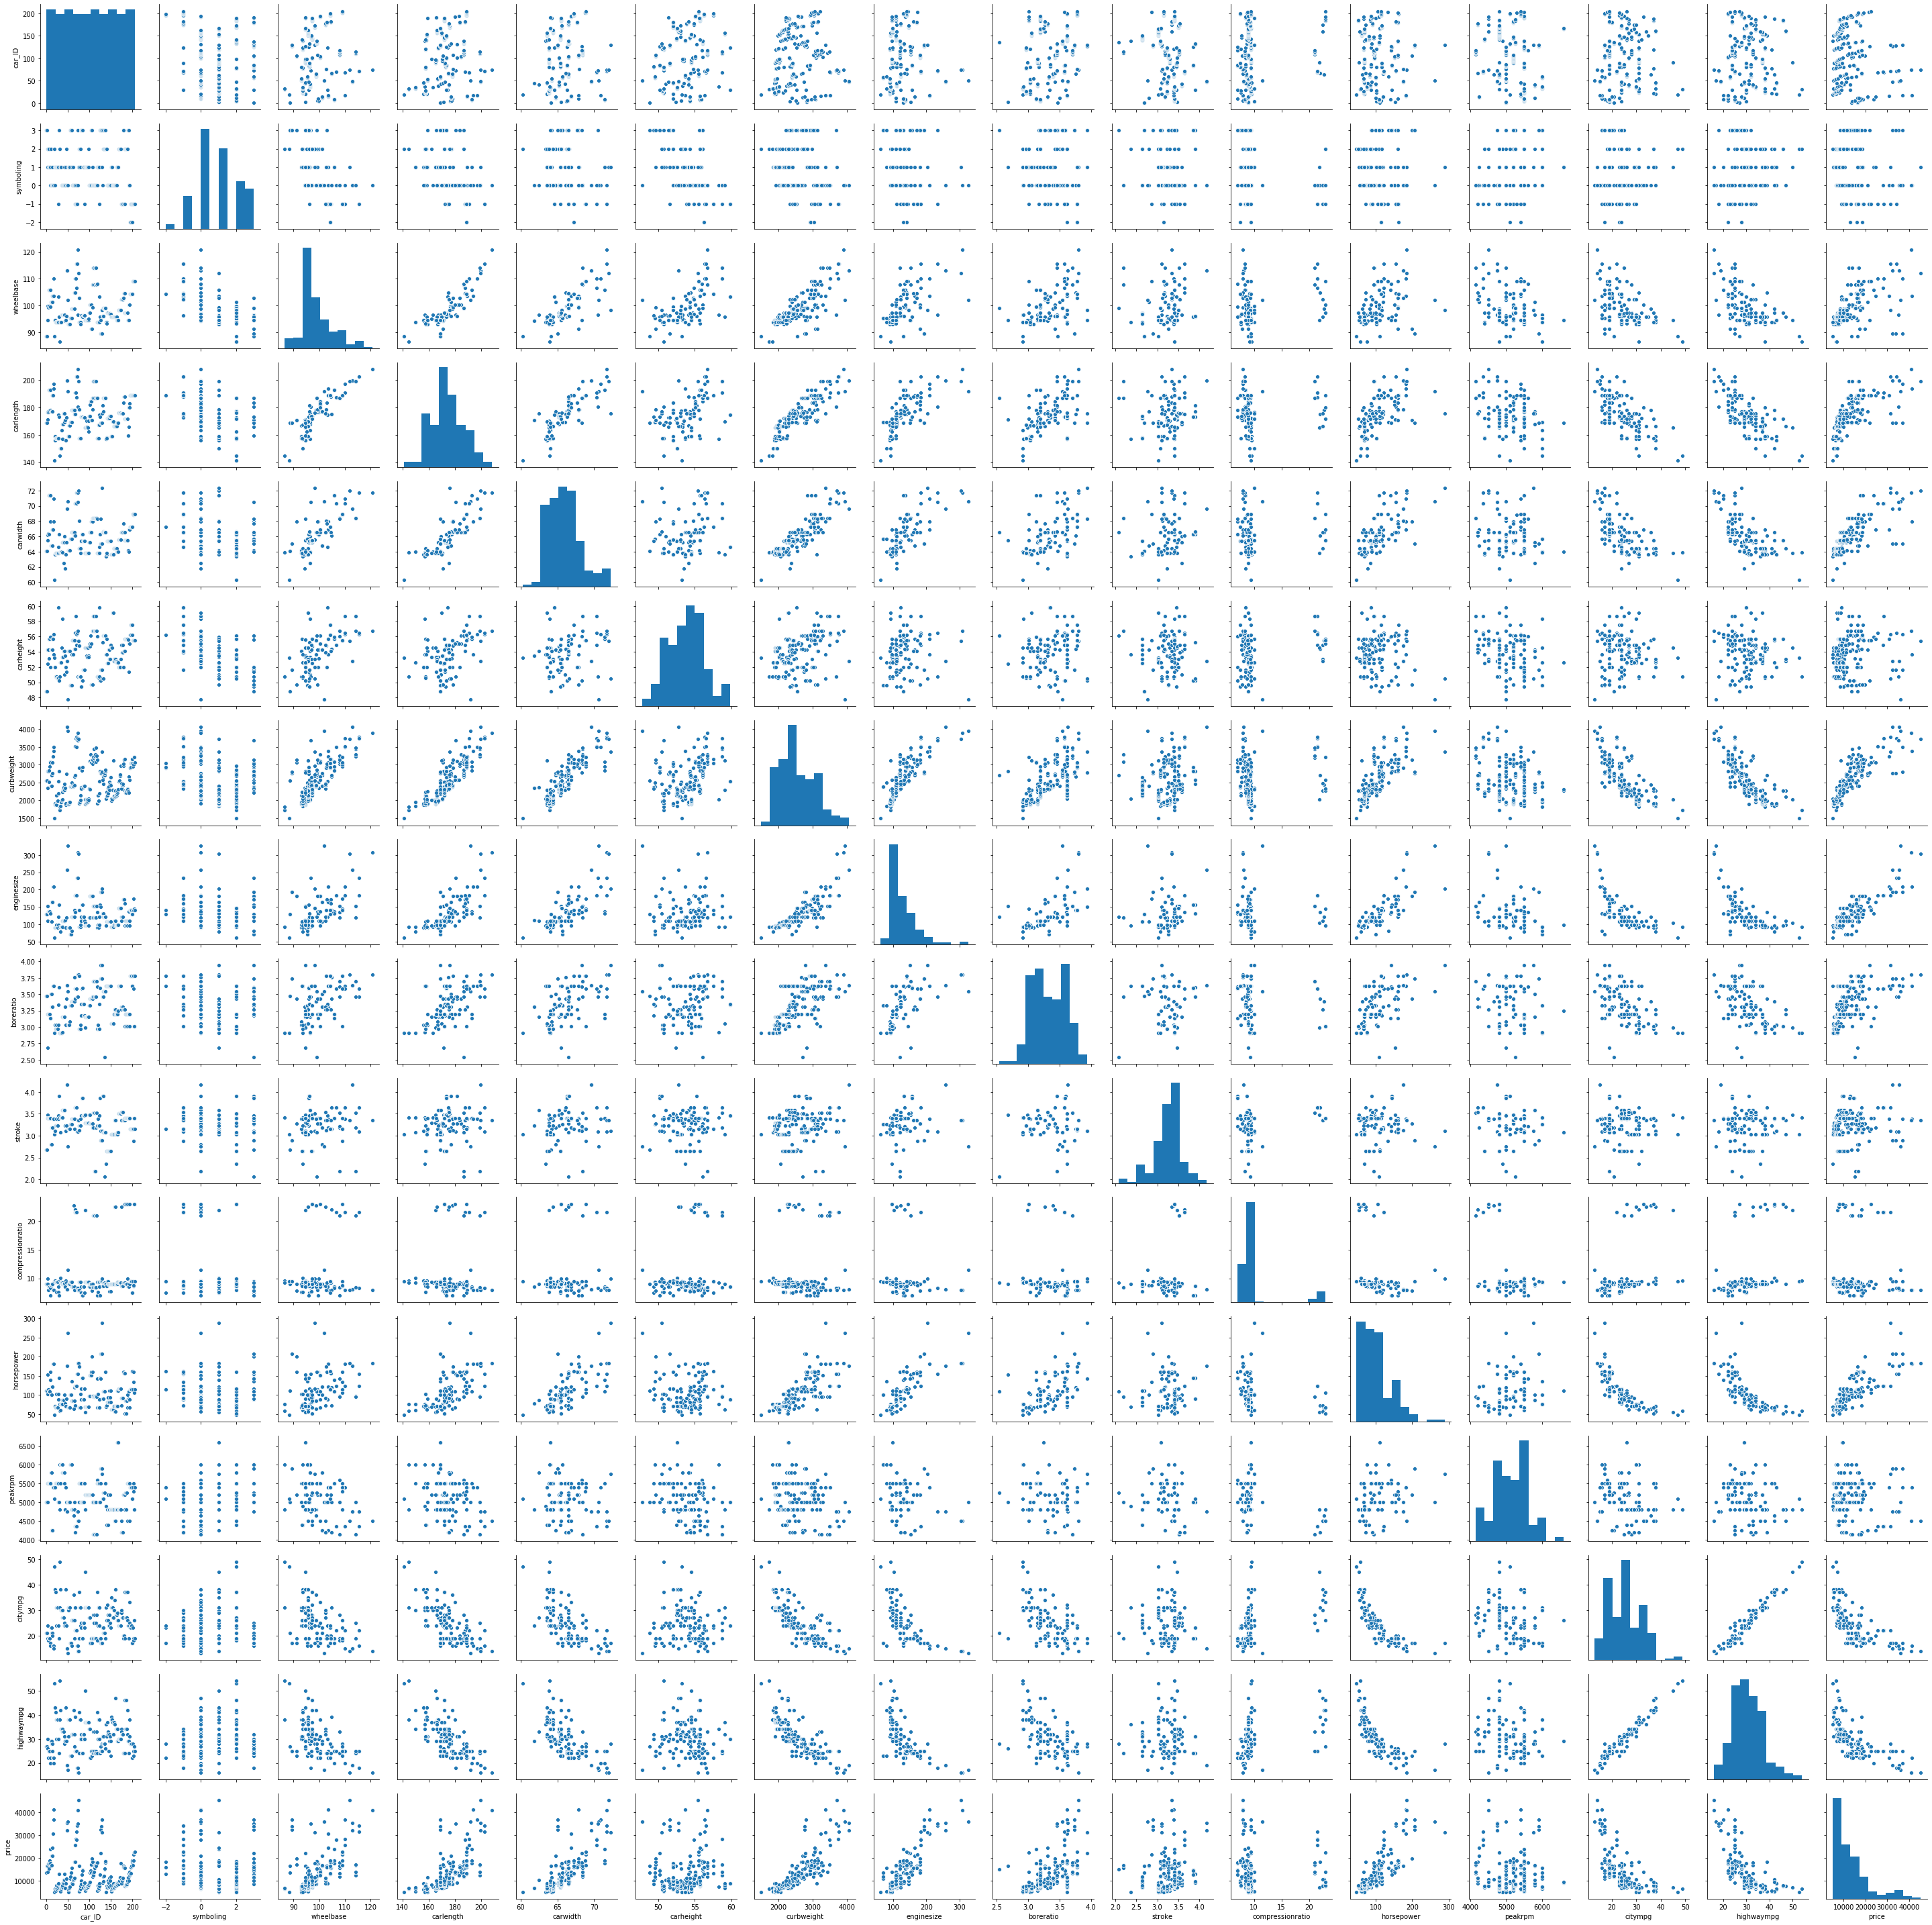

In [13]:
sns.pairplot(df)
plt.show()

<Figure size 432x288 with 0 Axes>

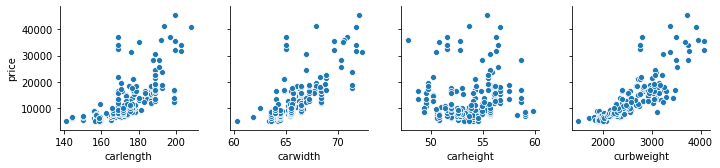

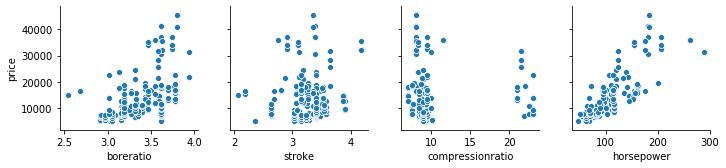

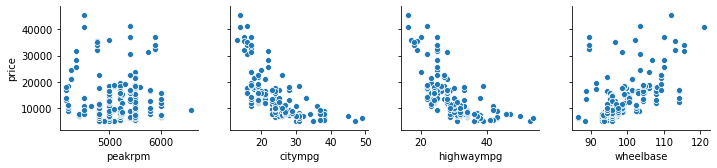

In [22]:
plt.figure()
#sns.pairplot(df, x_vars=['doornumber', 'carbody', 'drivewheel', 'enginelocation'],y_vars='price',kind='scatter')
sns.pairplot(df, x_vars=['carlength', 'carwidth', 'carheight', 'curbweight','enginesize'],y_vars='price',kind='scatter')
#sns.pairplot(df, x_vars=['enginetype', 'cylindernumber', 'enginesize', 'fuelsystem'],y_vars='price',kind='scatter')
sns.pairplot(df, x_vars=['boreratio', 'stroke','compressionratio', 'horsepower'],y_vars='price',kind='scatter')
sns.pairplot(df, x_vars=['peakrpm', 'citympg', 'highwaympg','wheelbase'],y_vars='price',kind='scatter')
plt.show()

As we can see, there are some linearity in the relationship between price and the numerical variables.
Let us now, plot a few variations of categorical variables along with their relationship with price.

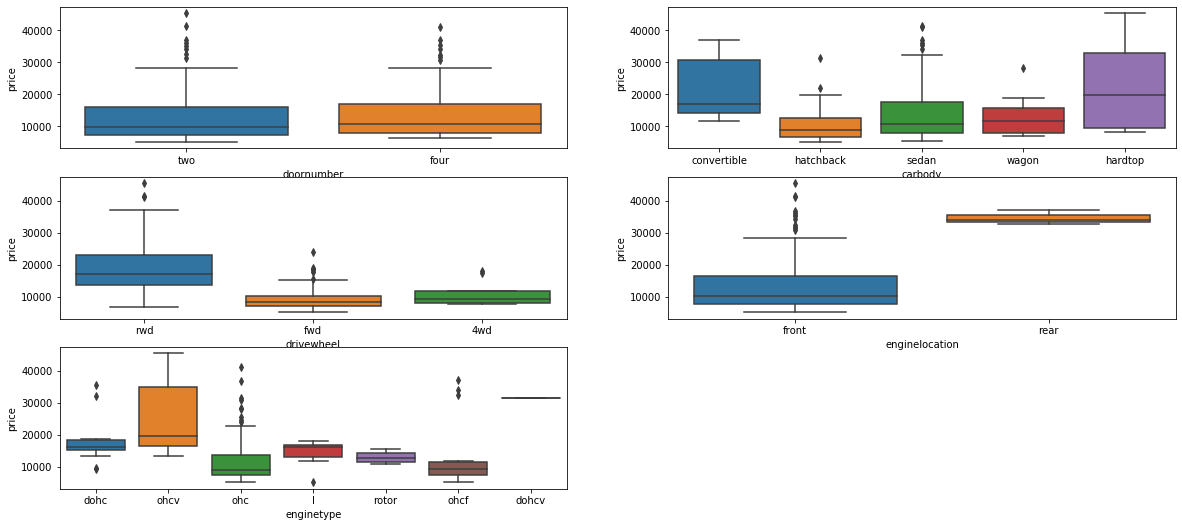

In [26]:
plt.figure(figsize=(20,12))
plt.subplot(4,2,1)
sns.boxplot(x='doornumber' ,y='price',data=df)
plt.subplot(4,2,2)
sns.boxplot(x='carbody',y='price',data=df)
plt.subplot(4,2,3)
sns.boxplot(x='drivewheel',y='price',data=df)
plt.subplot(4,2,4)
sns.boxplot(x='enginelocation',y='price',data=df)
plt.subplot(4,2,5)
sns.boxplot(x='enginetype',y='price',data=df)


plt.show()


### Data Preparation

In [8]:
#Extract Car company name from CarName variable
cars=df.CarName.str.split(expand=True)
df['CarCompany']=cars[0]

In [9]:
df['CarCompany'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
renault         2
maxda           2
porcshce        1
mercury         1
vokswagen       1
toyouta         1
Nissan          1
Name: CarCompany, dtype: int64

Here, we can see that certain car companies are repeated due to spelling mistake. For example, vw and vokswagen 
is the same. Nissan and nissan, toyouta and toyota. Let's correct these mistakes.

In [20]:
df['CarCompany']=df['CarCompany'].str.lower()

In [26]:
df['CarCompany'].loc[df['CarCompany']=='toyouta'] = "toyota"

150    toyota
151    toyota
152    toyota
153    toyota
154    toyota
155    toyota
156    toyota
157    toyota
158    toyota
159    toyota
160    toyota
161    toyota
162    toyota
163    toyota
164    toyota
165    toyota
166    toyota
167    toyota
168    toyota
169    toyota
170    toyota
171    toyota
172    toyota
173    toyota
174    toyota
175    toyota
176    toyota
177    toyota
178    toyota
179    toyota
180    toyota
181    toyota
Name: CarCompany, dtype: object

In [27]:
df['CarCompany'].loc[df['CarCompany']=='vw']="volkswagen"

In [28]:
df['CarCompany'].loc[df['CarCompany']=='vokswagen']="volkswagen"

In [29]:
df['CarCompany'].loc[df['CarCompany']=='maxda']="mazda"

In [31]:
df['CarCompany'].loc[df['CarCompany']=='porcshce']="porsche"

In [32]:
#Lets check all the unique counts and see if anymore mistakes to be handled
df['CarCompany'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarCompany, dtype: int64

In [33]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [41]:
#Lets check if any data type needs to be corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [39]:
#Creating a new data frame without car_id and car_name as it's not required
car_df=df[['symboling','fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype','cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price', 'CarCompany']]

In [52]:
car_df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [55]:
#change column value 4wd to fwd since they mean same
car_df['drivewheel'].loc[car_df['drivewheel']=='4wd']='fwd'

C:\Users\RebaReggie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
#lets further check the values of object variable to see if any more repeatitions/mistakes are there
car_df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [60]:
car_df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [40]:
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Let's create dummy varibales for the object variables.
Object variables include fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype,
cylindernumber, fuelsystem and CarCompany

In [61]:
dummy_df = pd.get_dummies(car_df.select_dtypes(object),drop_first=True)
dummy_df.columns

Index(['fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_jaguar', 'CarCompany_mazda', 'CarCompany_mercury',
       'CarCompany_mitsubishi', 'CarCompany_nissan', 'CarCompany_peugeot',
       'CarCompany_plymouth', 'CarCompany_porsche', 'CarCompany_renault',
       'CarC

So we have created the dummy variables for all object types, lets concat it with the main dataframe and drop existing ones

In [63]:
car_df=pd.concat([car_df,dummy_df],axis=1)
car_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1


In [65]:
car_df=car_df.drop(['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','CarCompany'],axis=1)

In [67]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
symboling                205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
fueltype_gas             205 non-null uint8
aspiration_turbo         205 non-null uint8
doornumber_two           205 non-null uint8
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8

As we can see there no object type variables left in the car dataframe. Let move on to next step.<br>
<br>
### Model Building<br>
>The first step in linear regression is splitting of data into test and train set

In [70]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test= train_test_split(car_df, train_size=.7, test_size=.3, random_state=100)

Now we have a train set with 70%(143) of the car data and a test set with 30% (62).<br>
Next step is rescaling the features so that they are all in a comparable scale. Here we are using MinMax scaling.

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [80]:
#Applying Scaling to all numeric variable but not to dummy variables
num_var=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

C:\Users\RebaReggie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RebaReggie\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [83]:
#Lets check if the scaling is done properly
df_train[num_var].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


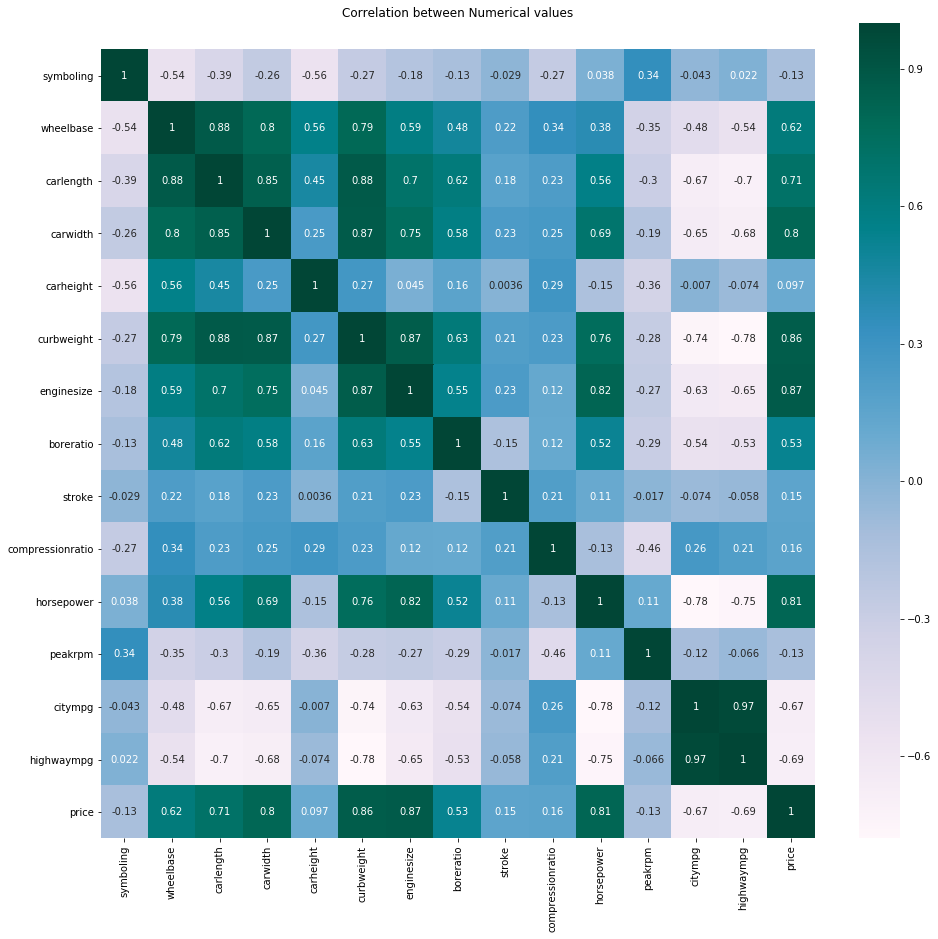

In [97]:
#Lets find the correlation between features to know which ones are highly correlated
corr=df_train[num_var].corr()
plt.figure(figsize=(16,15))
ax=plt.subplot()
sns.heatmap(corr,annot=True,cmap="PuBuGn")
ax.set_ylim(len(num_var),-0.5)
#ax.set_xlim(len(colm),-0.5)
fig.tight_layout()
plt.title("Correlation between Numerical values")
plt.show()

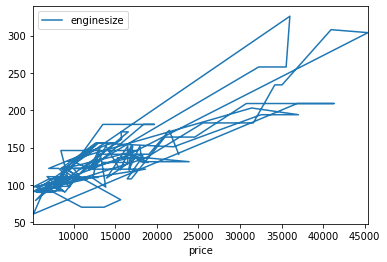

In [105]:
df.plot.line(x='price', y='enginesize')

By looking at the heatmap, we can find that price is highly correlated with engine size (0.87), curb weight (0.86), car width (0.8) and horsepower (0.81). We can confirm from the previous scatter plots that price has linear relationship with these variables <br>

Lets divide Data into X and Y to perform Linear regression.

In [100]:
y_train = df_train.pop('price')
X_train = df_train

### Perform Linear Regression 
<br>Since we have more than 50 variables from which we have to do feature selection, first we will build a model with RFE feature selection which is in sklearn for selecting few variables, followed by model building using statsmodel. Then we can analyse that model to remove some more variable and make the model more readable.

In [106]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [107]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [109]:
#Lets see which all columns RFE has selected for further build
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'CarCompany_bmw', 'CarCompany_peugeot',
       'CarCompany_porsche'],
      dtype='object')

Here, we can see that all variables with good correlation are selected by RFE but not horsepower. Let's move forward with this model and see if horsepower needs to be added or not.

In [110]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [111]:
#Explicitly fitting a constant field since we are using statsmodel for model building
import statsmodels.api as sm

# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_rfe).fit()

#parameters obtained
lr.params

C:\Users\RebaReggie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                   -0.277000
carwidth                 0.347104
curbweight               0.378501
enginesize               1.237243
boreratio               -0.358136
stroke                  -0.263932
enginelocation_rear      0.350632
enginetype_rotor         0.238291
cylindernumber_five      0.158106
cylindernumber_four      0.225901
cylindernumber_three     0.455256
cylindernumber_twelve   -0.446057
cylindernumber_two       0.238291
CarCompany_bmw           0.282122
CarCompany_peugeot      -0.109135
CarCompany_porsche       0.177912
dtype: float64

In [113]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.03e-70
Time:                        00:43:47   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

Summary:<br>
    > P - values for all the selected features are 0 and so are of high significance<br>
    > R - squared value and Adjusted R - squared value are ~93% which is really good so we should check VIF for         any multicollinearity<br>
    > There are few features with negative coefficients: const, CarCompany_peugeot, stroke, boreratio and const <br>
    > The value of Prob(F-statistics) is very low implying that the independent variables are not purely random         with respect to the dependent variable.<br>

In [125]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
2,enginesize,80.71
1,curbweight,54.10
0,carwidth,41.15
3,boreratio,34.56
4,stroke,30.89
8,cylindernumber_four,24.19
10,cylindernumber_twelve,2.81
7,cylindernumber_five,2.67


The VIF of enginetype_rotor, cylindernumber_two being 'inf' tells that there is perfect collinearity: you have completely redundant variables. Let's drop enginetype_rotor and rebuild the model.

In [115]:
X_train_new = X_train_rfe.drop(['enginetype_rotor'], axis = 1)

In [116]:
# Adding a constant variable  
X_train_lm1 = sm.add_constant(X_train_new)
X_train_lm1

,const,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,CarCompany_bmw,CarCompany_peugeot,CarCompany_porsche
122,1.0,0.291667,0.272692,0.139623,0.230159,0.525253,0,0,1,0,0,0,0,0,0
125,1.0,0.666667,0.500388,0.339623,1.000000,0.464646,0,0,1,0,0,0,0,0,1
166,1.0,0.308333,0.314973,0.139623,0.444444,0.449495,0,0,1,0,0,0,0,0,0
1,1.0,0.316667,0.411171,0.260377,0.626984,0.247475,0,0,1,0,0,0,0,0,0
199,1.0,0.575000,0.647401,0.260377,0.746032,0.484848,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.425000,0.354926,0.184906,0.388889,0.641414,0,0,1,0,0,0,0,0,0
103,1.0,0.516667,0.609775,0.452830,0.595238,0.545455,0,0,0,0,0,0,0,0,0
67,1.0,0.833333,0.786268,0.460377,0.714286,0.732323,0,1,0,0,0,0,0,0,0
24,1.0,0.291667,0.185803,0.109434,0.230159,0.525253,0,0,1,0,0,0,0,0,0


In [117]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.03e-70
Time:                        01:10:09   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

The R-squared, Adjusted R-squared and Prob(F-statistics) remain the same after dropping enginetype_rotor. Indicating it's redundancy. Now let's remove cylindernumber_two which also had 'inf' VIF and re-run the model.

In [118]:
X_train_new = X_train_lm1.drop(['cylindernumber_two'], axis = 1)
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.28e-62
Time:                        01:15:01   Log-Likelihood:                 193.18
No. Observations:                 143   AIC:                            -358.4
Df Residuals:                     129   BIC:                            -316.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

We can see that R-squared and Adjusted R-squared has reduced but is still significant. Now, the p-value of certain features has changed. Features such as cylindernumber_twelve, cylindernumber_five and cylindernumber_four has high p-value suggesting that these can be insignificant. Let's remove one of it and re-build the model.

In [119]:
X_train_new = X_train_lm2.drop(['cylindernumber_five'], axis = 1)
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     116.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.07e-63
Time:                        01:19:55   Log-Likelihood:                 193.18
No. Observations:                 143   AIC:                            -360.4
Df Residuals:                     130   BIC:                            -321.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

The R-squared, Adjusted R-squared and Prob(F-statistics) hasn't changed much after dropping cylindernumber_five, indicating its insignificance. There are still few variables with high p-value. Let's drop cylindernumber_twelve (0.770) and rebuild the model.

In [120]:
X_train_new = X_train_lm3.drop(['cylindernumber_twelve'], axis = 1)
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     128.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.86e-64
Time:                        01:23:24   Log-Likelihood:                 193.13
No. Observations:                 143   AIC:                            -362.3
Df Residuals:                     131   BIC:                            -326.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1278 

The vitals remains the same, so now let's drop cylindernumber_four which has a p-value of 0.550 and re-build the model.

In [121]:
X_train_new = X_train_lm4.drop(['cylindernumber_four'], axis = 1)
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     141.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.82e-65
Time:                        01:25:38   Log-Likelihood:                 192.93
No. Observations:                 143   AIC:                            -363.9
Df Residuals:                     132   BIC:                            -331.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1422 

The only feature left with high p-value is stroke (0.086). Before dropping it, let's just re consider the VIF and see if there are any more indications of multicollinearity with the existing model.

In [123]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm5.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,43.51
0,carwidth,33.81
2,enginesize,17.65
3,boreratio,9.84
4,stroke,7.24
9,CarCompany_porsche,1.79
5,enginelocation_rear,1.62
8,CarCompany_peugeot,1.40
7,CarCompany_bmw,1.14
6,cylindernumber_three,1.03


'curbweight' is having high VIF indicating multicollinearity. Let's drop it and re-build the model.

In [127]:
X_train_new = X_train_lm5.drop(['curbweight'], axis = 1)
X_train_lm6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.63e-59
Time:                        01:50:10   Log-Likelihood:                 175.35
No. Observations:                 143   AIC:                            -330.7
Df Residuals:                     133   BIC:                            -301.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1638 

In [128]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm6.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,22.80
2,boreratio,9.47
1,enginesize,9.24
3,stroke,7.17
8,CarCompany_porsche,1.70
4,enginelocation_rear,1.62
7,CarCompany_peugeot,1.24
6,CarCompany_bmw,1.14
5,cylindernumber_three,1.03


Still 'carwidth' is having very high VIF. Dropping curbweight has further reduced the R-squared and adjusted R-squared. But first we can remove this very high VIF and check the model.

In [129]:
X_train_new = X_train_lm6.drop(['carwidth'], axis = 1)
X_train_lm7 = sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_lm7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     71.28
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.54e-44
Time:                        01:54:02   Log-Likelihood:                 135.59
No. Observations:                 143   AIC:                            -253.2
Df Residuals:                     134   BIC:                            -226.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0895 

In [130]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm7.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,7.22
0,enginesize,5.77
2,stroke,5.02
7,CarCompany_porsche,1.67
3,enginelocation_rear,1.51
6,CarCompany_peugeot,1.16
5,CarCompany_bmw,1.13
4,cylindernumber_three,1.01


Let's remove 'stroke' and see if it significantly affects the vitals. Removing 'carwidth' has definitely affected. So we need to make sure that removing it was good idea or not.

In [131]:
X_train_new = X_train_lm7.drop(['stroke'], axis = 1)
X_train_lm8 = sm.add_constant(X_train_new)
lm8 = sm.OLS(y_train,X_train_lm8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     82.01
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.70e-45
Time:                        01:58:28   Log-Likelihood:                 135.54
No. Observations:                 143   AIC:                            -255.1
Df Residuals:                     135   BIC:                            -231.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0801 

In [132]:
#Let's compare it with a model which has carwidth but not stroke
X_train_new = X_train_lm6.drop(['stroke'], axis = 1)
X_train_lm9 = sm.add_constant(X_train_new)
lm9 = sm.OLS(y_train,X_train_lm9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.55e-60
Time:                        02:01:05   Log-Likelihood:                 174.30
No. Observations:                 143   AIC:                            -330.6
Df Residuals:                     134   BIC:                            -303.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1963 

In [133]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm9.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,15.98
2,boreratio,9.35
1,enginesize,9.12
3,enginelocation_rear,1.59
7,CarCompany_porsche,1.59
6,CarCompany_peugeot,1.17
5,CarCompany_bmw,1.14
4,cylindernumber_three,1.01


In [134]:
#Let's add horsepower to see the vitals and multicollinearity
X_train_new = pd.concat([X_train_lm9,X_train['horsepower']],axis=1)
X_train_new.columns

Index(['const', 'carwidth', 'enginesize', 'boreratio', 'enginelocation_rear',
       'cylindernumber_three', 'CarCompany_bmw', 'CarCompany_peugeot',
       'CarCompany_porsche', 'horsepower'],
      dtype='object')

In [136]:
X_train_lm10=X_train_new
lm10 = sm.OLS(y_train,X_train_lm10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.56e-60
Time:                        02:07:37   Log-Likelihood:                 176.99
No. Observations:                 143   AIC:                            -334.0
Df Residuals:                     133   BIC:                            -304.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1922 

In [137]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm10.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,16.70
1,enginesize,14.52
8,horsepower,11.40
2,boreratio,9.35
7,CarCompany_porsche,1.85
3,enginelocation_rear,1.59
6,CarCompany_peugeot,1.20
5,CarCompany_bmw,1.14
4,cylindernumber_three,1.01


Introduction Horsepower has improved the model but has also shown an increase in multicollinearity. So instead let's remove boreratio rather than adding horsepower to see how it affects the model.

In [140]:
X_train_lm11 = X_train_lm9.drop(['boreratio'], axis = 1)
lm11 = sm.OLS(y_train,X_train_lm11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.67e-61
Time:                        02:17:39   Log-Likelihood:                 174.00
No. Observations:                 143   AIC:                            -332.0
Df Residuals:                     135   BIC:                            -308.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2038 

In [142]:
vif = pd.DataFrame()
X = X_train_lm11.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,9.09
0,carwidth,9.06
2,enginelocation_rear,1.58
6,CarCompany_porsche,1.57
5,CarCompany_peugeot,1.16
4,CarCompany_bmw,1.13
3,cylindernumber_three,1.00


In [145]:
#Still VIF shows that enginesize and carwidth are collinear. So let's drop engine size and check
X_train_lm12 = X_train_lm11.drop(['enginesize'], axis = 1)
lm12 = sm.OLS(y_train,X_train_lm12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     107.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.99e-49
Time:                        02:22:20   Log-Likelihood:                 141.69
No. Observations:                 143   AIC:                            -269.4
Df Residuals:                     136   BIC:                            -248.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2461 

In [147]:
vif = pd.DataFrame()
X = X_train_lm12.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CarCompany_porsche,1.57
1,enginelocation_rear,1.51
0,carwidth,1.24
4,CarCompany_peugeot,1.13
3,CarCompany_bmw,1.06
2,cylindernumber_three,1.00


We can see that the multicollinearity is now reduced and R-squared value is >80% which is still significant.
But p-value of CarCompany_porsche is still high. So let's remove it decide if it should be removed or use the existing model.

In [148]:
X_train_lm13 = X_train_lm12.drop(['CarCompany_porsche'], axis = 1)
lm13 = sm.OLS(y_train,X_train_lm13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.49e-50
Time:                        02:29:16   Log-Likelihood:                 141.61
No. Observations:                 143   AIC:                            -271.2
Df Residuals:                     137   BIC:                            -253.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2479 

In [149]:
vif = pd.DataFrame()
X = X_train_lm13.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,1.18
4,CarCompany_peugeot,1.12
3,CarCompany_bmw,1.06
1,enginelocation_rear,1.01
2,cylindernumber_three,1.00


We have a model which is significant enough and has low multicollinearity. But the number features are very less. Let's consider adding few features to see if it increases the efficiency of the model.

In [154]:
X_train_lm14 = pd.concat([X_train_lm13,X_train['horsepower']],axis=1)
lm14 = sm.OLS(y_train,X_train_lm14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.81e-56
Time:                        02:41:29   Log-Likelihood:                 159.33
No. Observations:                 143   AIC:                            -304.7
Df Residuals:                     136   BIC:                            -283.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2149 

In [155]:
vif = pd.DataFrame()
X = X_train_lm14.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,6.57
5,horsepower,6.52
4,CarCompany_peugeot,1.19
1,enginelocation_rear,1.13
3,CarCompany_bmw,1.09
2,cylindernumber_three,1.00


We can see that adding horsepower has significantly increased the model accuracy and has not affected any p-value. But checking the VIF we see that carwidth and horsepower can be collinear but since it's not too high, we keep horsepower and try the model to check for it's accuracy.<br>
### Residual Analysis of the train data<br>
> Check if the error terms are normally distributed.

In [156]:
#predict the price value of train set and compare with actual value
y_train_price=lm14.predict(X_train_lm14)

Text(0.5, 0, 'Errors')

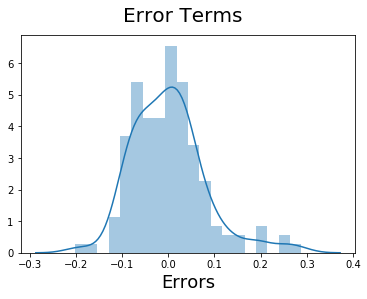

In [157]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18) 

We observe that the error terms are almost normally distributed with mean and peak at around zero.<br>
Now let's go ahead and make predictions on test set.<br>
### Making Predictions

In [158]:
#apply scaling on test set
df_test[num_var] = scaler.transform(df_test[num_var])

C:\Users\RebaReggie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RebaReggie\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [169]:
#Divide into X and Y
y_test = df_test.pop('price')
feat=list(vif['Features'])
X_test = df_test[feat]

In [170]:
# Adding constant variable to test dataframe
X_test_m14 = sm.add_constant(X_test)

In [171]:
X_test_m14

,const,carwidth,horsepower,CarCompany_peugeot,enginelocation_rear,CarCompany_bmw,cylindernumber_three
160,1.0,0.341667,0.091667,0,0,0,0
186,1.0,0.433333,0.154167,0,0,0,0
59,1.0,0.516667,0.150000,0,0,0,0
165,1.0,0.308333,0.266667,0,0,0,0
140,1.0,0.291667,0.104167,0,0,0,0
...,...,...,...,...,...,...,...
28,1.0,0.358333,0.166667,0,0,0,0
29,1.0,0.500000,0.404167,0,0,0,0
182,1.0,0.433333,0.016667,0,0,0,0
40,1.0,0.183333,0.158333,0,0,0,0


In [172]:
y_pred_m14=lm14.predict(X_test_m14)

### Model Evaluation

Text(0, 0.5, 'y_pred')

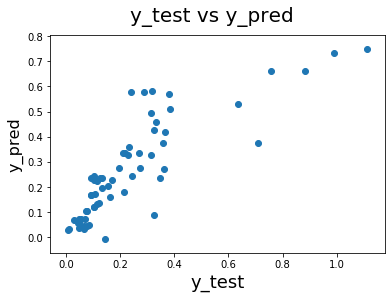

In [173]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m14)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [174]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m14)
r_squared = r2_score(y_test, y_pred_m14)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.016874731333909185
r_square_value : 0.6842789781667371


In [1]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_m14, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

NameError: name 'plt' is not defined

Summary:<br>
   > The model build has adjusted R-squared of 85% which is good enough. <br>
   > On comparing the actual and predicted values, the peaks are not being predicted properly.<br>
   > The Scatter Plot of y_pred vs y_actual shows an almost linear relationship with a few outliers.<br>
   > The model could have been improved with more features that won't add a multicollinearity.<br>